## Exploratory Data Analysis - Retail

__by : Nidisha Mandlik__

Perform ‘Exploratory Data Analysis’ on dataset  ‘SampleSuperstore’ , ﬁnd out the weak areas where you can work to make more proﬁt.  

Dataset : https://bit.ly/3i4rbWl

Importing all the libraries that required for this project.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

__Understanding the Data__

In [5]:
df = pd.read_csv(r'C:\Users\HP\Desktop\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
df.shape

(9994, 13)

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

<AxesSubplot:ylabel='Segment'>

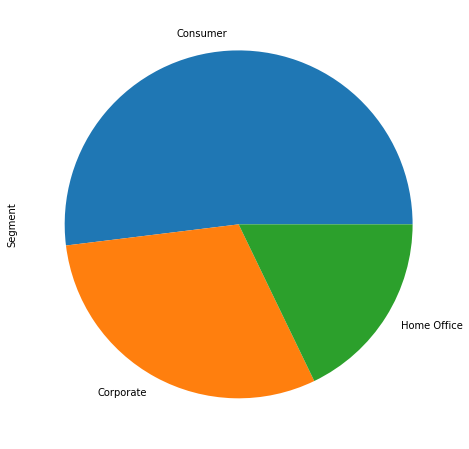

In [71]:
plt.figure(figsize=(14,8))
df['Segment'].value_counts().plot.pie()

In [12]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

<AxesSubplot:ylabel='Ship Mode'>

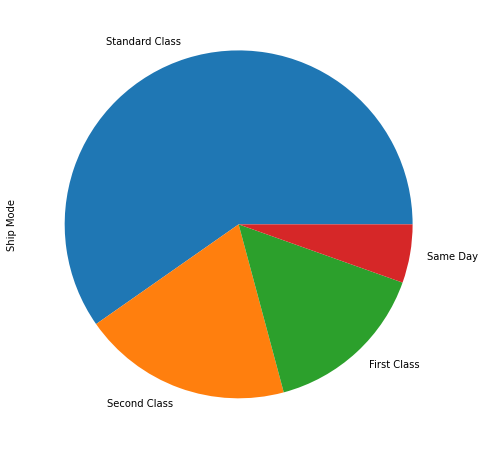

In [72]:
plt.figure(figsize=(14,8))
df['Ship Mode'].value_counts().plot.pie()

<AxesSubplot:ylabel='Sub-Category'>

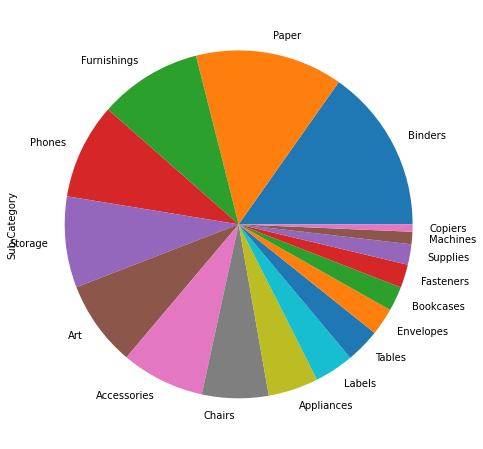

In [70]:
plt.figure(figsize=(14,8))
df['Sub-Category'].value_counts().plot.pie()

__Cleaning the data__

In [13]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [62]:
Store = df.drop(['Postal Code'],axis=1)
Store.head(10)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### EDA

Relationship Analysis

In [63]:
corr = Store.corr()

<AxesSubplot:>

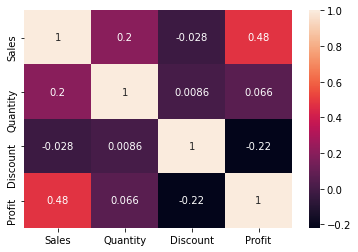

In [64]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

catplot for Sales VS Segment and Sales VS Ship Mode 

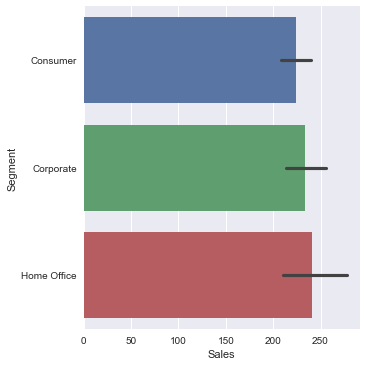

In [84]:
sns.catplot(x='Sales',y='Segment',data=df,kind='bar')

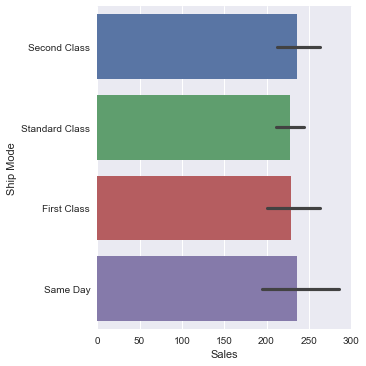

In [85]:
sns.catplot(x='Sales',y='Ship Mode',data=df,kind='bar')

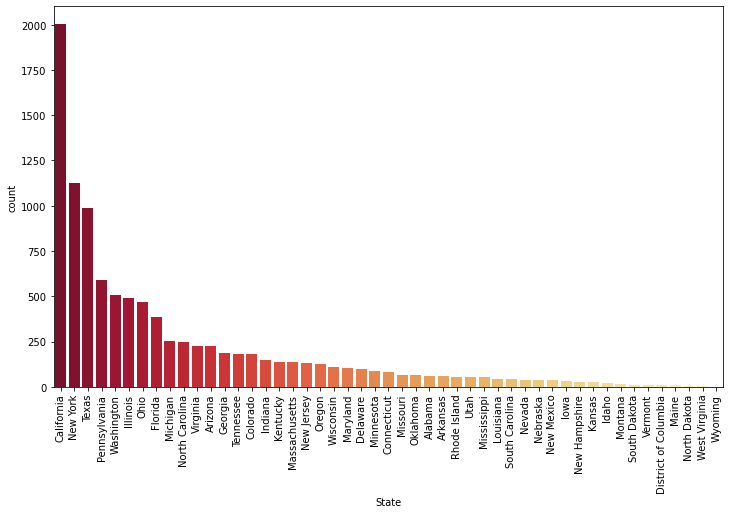

In [76]:
plt.figure(figsize=(12,7))
sns.countplot(x='State',data=df,palette='YlOrRd_r',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

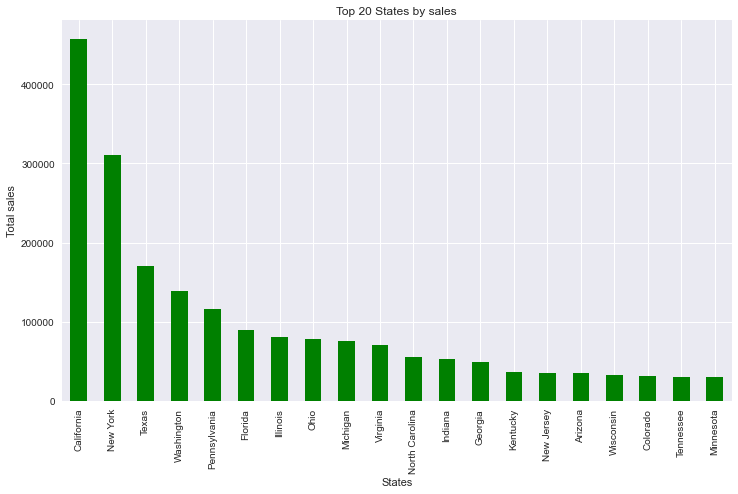

In [82]:
plt.style.use('seaborn')
df.groupby('State').Sales.sum().nlargest(n=20).plot(kind='bar',figsize=(12,7),color='green')
plt.xlabel('States')
plt.ylabel('Total sales')
plt.title('Top 20 States by sales')
plt.show()

__California has Highest Sales__

comapring Sales VS Quantity VS Profit

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<AxesSubplot:title={'center':'Profit VS Quantity'}, xlabel='Sub-Category'>

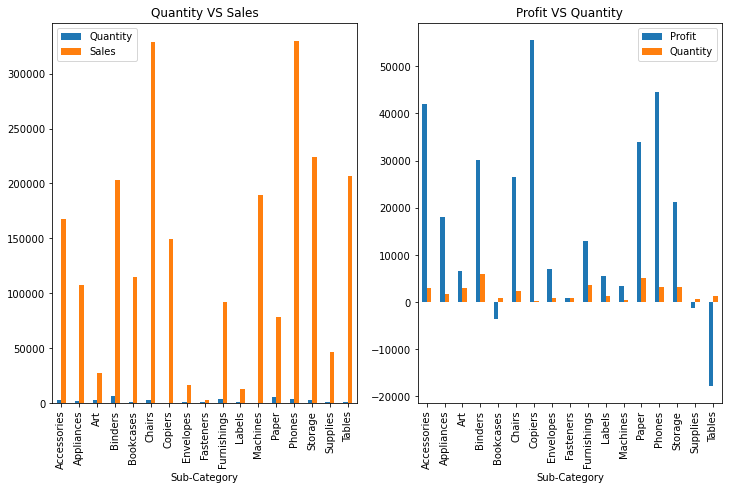

In [65]:
fig,axes=plt.subplots(1,2,figsize=(12,7))
df.groupby('Sub-Category')['Quantity','Sales'].agg(sum).plot(kind='bar',ax=axes[0],title='Quantity VS Sales')

df.groupby('Sub-Category')['Profit','Quantity'].agg(sum).plot(kind='bar',ax=axes[1],title='Profit VS Quantity')


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


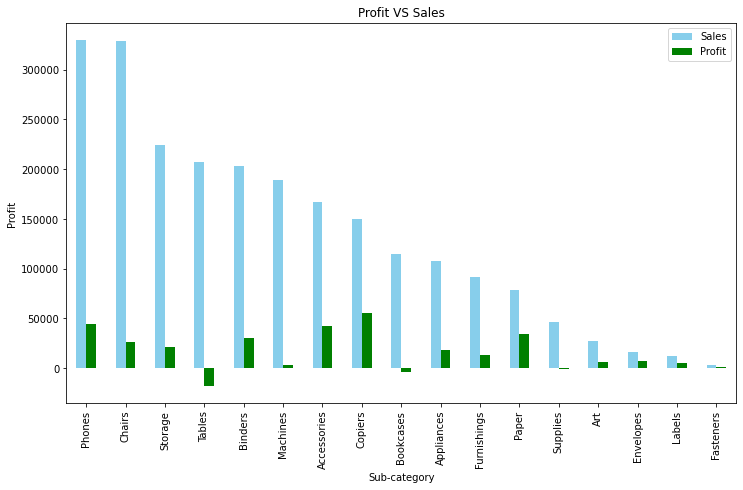

In [66]:
Profit_sales=df.groupby('Sub-Category')['Sales','Profit'].sum().sort_values(by='Sales',ascending=False)
Profit_sales.plot.bar(color=['skyblue','green'],figsize=(12,7))
plt.title('Profit VS Sales')
plt.xlabel('Sub-category')
plt.ylabel('Profit')
plt.show()

__Copiers have Highest Profit even though Phones and chairs has highest sales in the market.__


Conclusion:
Home office has highest sales compared to other Segments.
Same day has highest sales compared to other Ship Mode.
California State is at Top of in both Sales and Profit.
Copiers have highest profit even though phones and chairs both have highest sales in the 
Chairs have high sales but least profit compared to phones.
Tables have least profit.